# Part II - (Loan Data from Prosper)
## by (Afnan Abdullah K Alshehri)

## Investigation Overview


> I would like to discover what are the major features for predicting the borrower annual percentage rate of loan in the dataset
The main focus was on the amount of loan, monthly loan payment, and the characteristics of the borrowers such as their incomes and employment status.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
#Load dataset
loan=pd.read_csv(r"C:\Users\HP\.jupyter\prosperLoanData.csv")
pd.set_option("display.max_rows", None,"display.max_columns", None) #show entire dataframe
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [21]:
loan_n=loan[['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','ProsperRating (Alpha)',
             'ListingCategory (numeric)','BorrowerState','EmploymentStatus','IsBorrowerHomeowner',
             'OpenCreditLines','IncomeRange','StatedMonthlyIncome','TotalProsperLoans',
             'LoanMonthsSinceOrigination','LoanOriginalAmount','LoanOriginationQuarter',
             'MonthlyLoanPayment','Investors']].copy()

In [22]:
loan_n.drop_duplicates(subset = 'ListingKey', inplace = True)

In [23]:
#change object type in dates to to datatype
def dates(x):
    loan_n[x]=pd.to_datetime(loan[x])
dates('ListingCreationDate')

In [24]:
#fill nulls values with 0
def nulls_i(x):
    loan[x]=loan_n[x].fillna(0, inplace=True)
nulls_i('OpenCreditLines')
nulls_i('TotalProsperLoans')
nulls_i('BorrowerAPR')

In [25]:
def integers(x):
    loan_n[x]=loan_n[x].astype('int')  
integers('OpenCreditLines')
integers('TotalProsperLoans')

In [26]:
past_due=loan_n['LoanStatus'].str.contains("Past Due")

loan_n.loc[past_due,'LoanStatus']='Past Due'

In [27]:
#loan_n['ProsperRating (Alpha)'] = loan_n['ProsperRating (Alpha)'].fillna('Not Available')
loan_n['BorrowerState'] = loan_n['BorrowerState'].fillna('N/A')
loan_n.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
ProsperRating (Alpha)         29084
ListingCategory (numeric)         0
BorrowerState                     0
EmploymentStatus               2255
IsBorrowerHomeowner               0
OpenCreditLines                   0
IncomeRange                       0
StatedMonthlyIncome               0
TotalProsperLoans                 0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationQuarter            0
MonthlyLoanPayment                0
Investors                         0
dtype: int64

In [28]:
#Change labels in Listing Category from numbers to clear list
labels={0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',
        5:'Student Use',6:'Auto',7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
        11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',14:'Large Purchases',
        15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}
def Listing_Category(x):
    if x in list(labels.keys()):
        return (labels[x])
    else:
        return ('Not found')

    
loan_n['ListingCategory (numeric)']=loan_n['ListingCategory (numeric)'].apply(Listing_Category)

In [29]:
def category(x):
    loan_n[x]=loan_n[x].astype('category') 
category('Term')    
category('LoanStatus')
category('ListingCategory (numeric)')
category('ProsperRating (Alpha)')    
category('BorrowerState') 
category('EmploymentStatus')  
category('IncomeRange')

In [30]:
loan_n.rename(columns={'ListingKey':'Listing Key','ListingCreationDate':'Listing Creation Date','LoanStatus':'Loan Status',
                       'BorrowerAPR':'Borrower APR','ProsperRating (Alpha)':'Prosper Rating','ListingCategory (numeric)':'Listing Category',
                       'BorrowerState':'Borrower State','EmploymentStatus':'Employment Status',
                       'IsBorrowerHomeowner':'Is Borrower Homeowner','OpenCreditLines':'Open Credit Lines','IncomeRange':'Income Range',
                       'StatedMonthlyIncome':'Stated Monthly Income','TotalProsperLoans':'Total Prosper Loans',
                       'LoanMonthsSinceOrigination':'Loan Months Since Origination','LoanOriginalAmount':'Loan Original Amount',
                       'LoanOriginationQuarter':'Loan Origination Quarter','MonthlyLoanPayment':'Monthly Loan Payment'},inplace=True)

In [31]:
loan_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Listing Key                    113066 non-null  object        
 1   Listing Creation Date          113066 non-null  datetime64[ns]
 2   Term                           113066 non-null  category      
 3   Loan Status                    113066 non-null  category      
 4   Borrower APR                   113066 non-null  float64       
 5   Prosper Rating                 83982 non-null   category      
 6   Listing Category               113066 non-null  category      
 7   Borrower State                 113066 non-null  category      
 8   Employment Status              110811 non-null  category      
 9   Is Borrower Homeowner          113066 non-null  bool          
 10  Open Credit Lines              113066 non-null  int32         
 11  

## What is distribution of Borrower Annual Percentage Rate?

> Borrower APR in the dataset is approximately normally distributed with the peak around 20 percent.

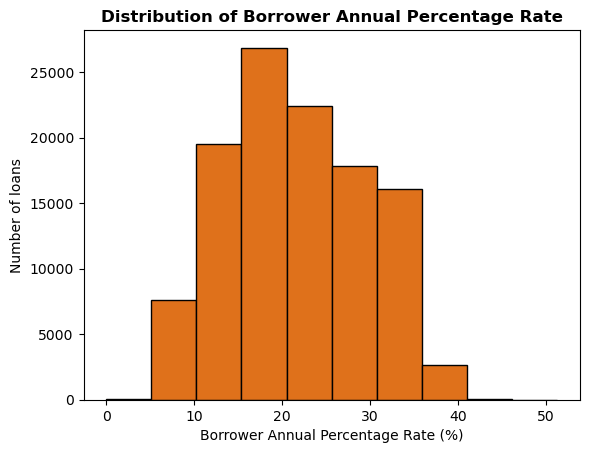

In [32]:
loan_n['BorrowerAPR_percent']=loan_n['Borrower APR'].mul(100)
plt.hist(data=loan_n,x='BorrowerAPR_percent',color='#DF711B',edgecolor='black')
#plt.xscale('log')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Number of loans')
plt.title(f'Distribution of Borrower Annual Percentage Rate',weight='bold');

## What is relationship between the loan original amount and Borrower Annual Percentage Rate?

> • In this graph the lower the loan amount is the higher the Borrower Annual Percentage Rate.

> • Most Loan Original Amount is less than 20K.


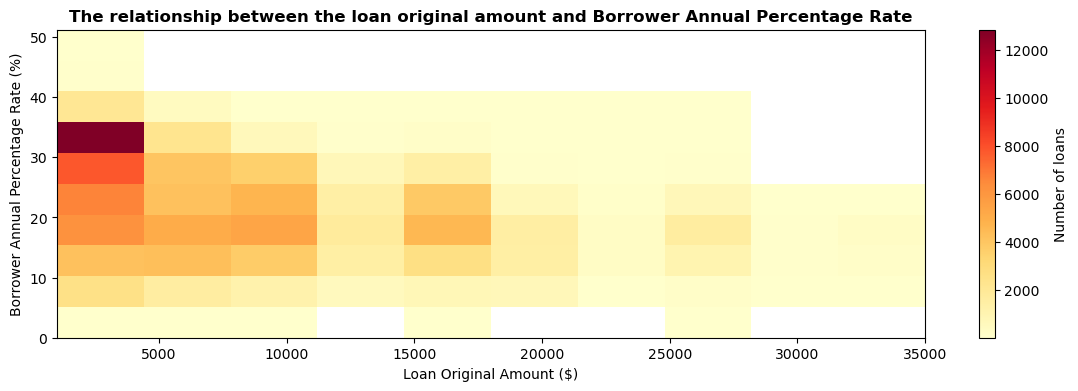

In [33]:
plt.figure(figsize=[14,4])
x_bins=np.arange(1000,loan_n['Loan Original Amount'].max()+2000,2000)
y_bins=np.arange(loan_n['BorrowerAPR_percent'].min(),loan_n['BorrowerAPR_percent'].max()+0.5,0.5)
h2d=plt.hist2d(data = loan_n, x ='Loan Original Amount', y ='BorrowerAPR_percent', cmin=0.5, cmap='YlOrRd')
plt.colorbar(label = 'Number of loans')
plt.title('The relationship between the loan original amount and Borrower Annual Percentage Rate',weight='bold')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower Annual Percentage Rate (%)');

## What is the realationship between employment status and term?
> • In this plot the 36 term is the most frequent, and we find that most of the borrowers are employed in the 36 term.

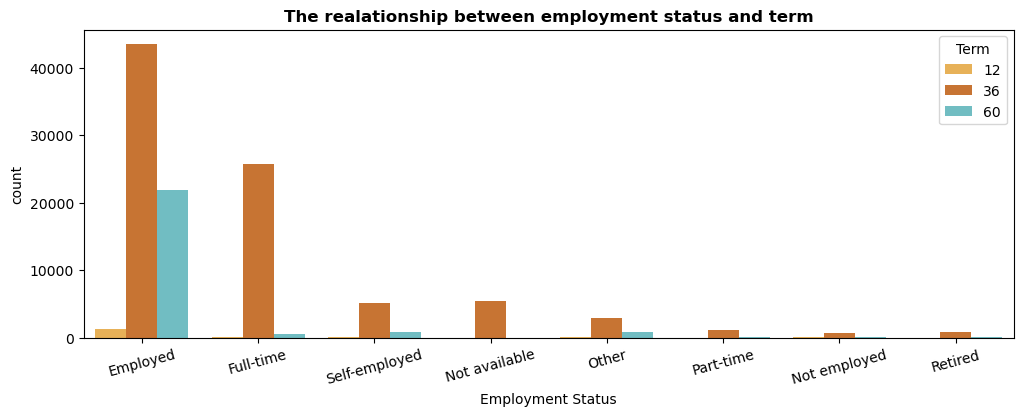

In [34]:
plt.figure(figsize=[12,4])
order_c=loan_n['Employment Status'].value_counts().index
sb.countplot(data = loan_n, x = 'Employment Status', hue = 'Term',
             palette=['#FFB740','#DF711B','#64C9CF'],order=order_c)
plt.title('The realationship between employment status and term',weight='bold')
plt.xticks(rotation=15);

## What is the Income Range and Borrower Annual Percentage Rate across Loan Status?

> • In this graph the income range from 0`$` to 999`$` and not-employed have high Borrower Annual Percentage Rate.

> • The Highest Borrower Annual Percentage Rate for each income range is `past due`.

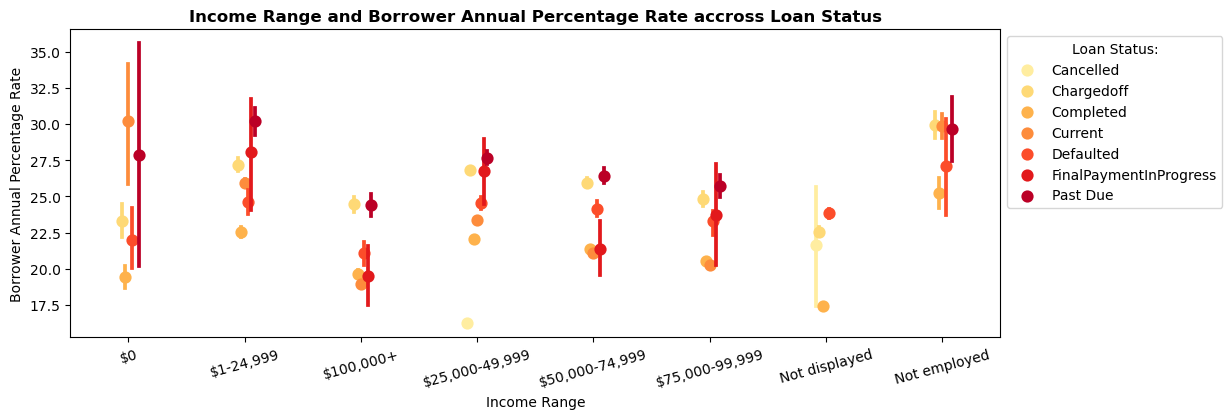

In [35]:
plt.figure(figsize = [12, 4])
ax=sb.pointplot(data=loan_n,x='Income Range',y = 'BorrowerAPR_percent' ,hue='Loan Status' ,
                palette='YlOrRd',linestyles="",dodge=True)
ax.set_yticklabels([],minor=True)
plt.legend(title='Loan Status:',bbox_to_anchor=(1,1),loc="upper left")
plt.title('Income Range and Borrower Annual Percentage Rate accross Loan Status',weight='bold')
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=15);

In [49]:
!jupyter nbconvert Part_II_slide_deck_template_Afnan_Abdullah.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template_Afnan_Abdullah.ipynb to slides
[NbConvertApp] Writing 800272 bytes to Part_II_slide_deck_template_Afnan_Abdullah.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_